Differences in derived mental health severity scores between US and non-US samples

Null hypothesis: There is no statistically significant difference between mean mental health severity scores between US and non-US populations

Alternate hypothesis: The mean mental health severity of the US population is less than that of populations outside of the US.

Results: The p-value obtained from our Mann-Whitney U-test exceeds our alpha value of 0.05, so we fail to reject our null hypothesis

In [39]:
from pathlib import Path
from numpy import number
import pandas as pd
import pprint
import scipy.stats as st

import matplotlib.pyplot as plt

In [40]:
csv_path = Path("./df_factors.csv")
orig_df = pd.read_csv(csv_path)

In [41]:
working_df = orig_df.groupby("country")["mental_health_severity"].value_counts().unstack(fill_value=0)
working_df["n_points"] = working_df.sum(axis=1)

In [42]:
columns = working_df.columns.tolist()
for elem in columns:
    if elem in working_df.columns:
        working_df_prop = working_df.div(working_df[elem], axis=0)

country_prop_dict = {}

for country in working_df_prop.index:
    country_weighted_total = 0;
    for i in range(len(working_df_prop.loc[country]) - 1):

        country_weighted_total += i * working_df_prop.loc[country].iloc[i]

    country_prop_dict[country] = country_weighted_total
    country_weighted_total = 0

In [43]:
results_df = pd.DataFrame(country_prop_dict.items(), columns=["country", "severity"])
pprint.pp(results_df)

                   country  severity
0                Australia  6.050614
1                  Belgium  6.103155
2   Bosnia and Herzegovina  5.987179
3                   Brazil  5.987179
4                   Canada  6.036170
5                 Colombia  5.987179
6               Costa Rica  5.987179
7                  Croatia  5.987179
8           Czech Republic  5.987179
9                  Denmark  5.987179
10                 Finland  5.987179
11                  France  5.987179
12                 Georgia  5.987179
13                 Germany  5.987179
14                  Greece  5.987179
15                   India  6.021629
16                 Ireland  6.021629
17                  Israel  5.987179
18                   Italy  5.987179
19                  Mexico  5.987179
20                 Moldova  5.987179
21             Netherlands  6.003393
22             New Zealand  6.035105
23                 Nigeria  5.987179
24             Philippines  5.987179
25                  Poland  6.103155
2

In [44]:
n_points_list = working_df["n_points"].to_list()
results_df["n_points"] = n_points_list

n_points_total = results_df["n_points"].sum(axis=0)

results_df["n_points_prop"] = results_df["n_points"].div(n_points_total, axis=0)
print("Total # of data points: " + str(n_points_total))

Total # of data points: 287162


In [45]:
weighted_severity_list = results_df["severity"].to_list()
n_points_prop_list = results_df["n_points_prop"].to_list()

for i in range(len(weighted_severity_list)):
    weighted_severity_list[i] = weighted_severity_list[i] * n_points_prop_list[i]

results_df["weighted_severity"] = weighted_severity_list

In [46]:
n_rows = len(results_df)

us_severity = results_df.values[n_rows - 1][4]
non_us_severity = 0

for i in range(n_rows - 2):
    non_us_severity += results_df.values[i][4]

In [47]:
country_score_slices_df = pd.DataFrame()
country_score_slices_df["country"] = orig_df["country"].copy()
country_score_slices_df["severity"] = orig_df["mental_health_severity"].copy()
country_score_slices_df["severity"] = orig_df["mental_health_severity"].copy()

pprint.pp(country_score_slices_df)

              country  severity
0       United States         2
1       United States         2
2              Poland         2
3           Australia         2
4       United States         2
...               ...       ...
287157  United States        -1
287158   South Africa        -1
287159  United States        -1
287160  United States        -1
287161  United States        -1

[287162 rows x 2 columns]


In [48]:
us_df = country_score_slices_df[country_score_slices_df.country == "United States"]
non_us_df = country_score_slices_df[country_score_slices_df.country != "United States"]
print("US measurements:")
pprint.pp(us_df)
print("Non-US measurements")
pprint.pp(non_us_df)

US measurements:
              country  severity
0       United States         2
1       United States         2
4       United States         2
5       United States         2
6       United States         2
...               ...       ...
287156  United States        -1
287157  United States        -1
287159  United States        -1
287160  United States        -1
287161  United States        -1

[168056 rows x 2 columns]
Non-US measurements
               country  severity
2               Poland         2
3            Australia         2
10              Canada         2
12      United Kingdom         2
14        South Africa         2
...                ...       ...
287150          Canada        -1
287153          Poland        -1
287154         Ireland        -1
287155       Australia        -1
287158    South Africa        -1

[119106 rows x 2 columns]


In [49]:
us_avg = us_df[["severity"]].mean()
non_us_avg = non_us_df[["severity"]].mean()
print("us: "+ str(us_avg))
print("non-us: " + str(non_us_avg))

us: severity    0.032102
dtype: float64
non-us: severity    0.018471
dtype: float64


In [50]:
us_severity_list = us_df["severity"].to_list()
non_us_severity_list = non_us_df["severity"].to_list()

print(st.normaltest(us_df[["severity"]]))

NormaltestResult(statistic=array([776.82465918]), pvalue=array([2.0638045e-169]))


In [51]:
# testing at 95% confidence, a = 0.05
alpha = 0.05

# perform one-sided Mann-Whitney U-test
print(st.mannwhitneyu(us_severity_list, non_us_severity_list, alternative="less", axis=0, nan_policy="raise"))
test_stat, p_value = st.mannwhitneyu(us_severity_list, non_us_severity_list, alternative="less", axis=0, nan_policy="raise")
print("Test statistic: " + str(test_stat))
print("P-value: " + str(p_value))

MannwhitneyuResult(statistic=10042512229.5, pvalue=0.9431702048590704)
Test statistic: 10042512229.5
P-value: 0.9431702048590704


In [55]:
if p_value < alpha:
    print("Reject H0: P-value is less than alpha, so null-hypothesis is rejected. There is a statistically significant difference between mental health severity of US and non-US popualtions.")
else:
    print("Fail to reject H0: P-value is greater than alpha, so we fail to reject our null hypothesis. There is no statistically significant difference between mental health severity of US vs non-US populations")

Fail to reject H0: P-value is greater than alpha, so we fail to reject our null hypothesis. There is no statistically significant difference between mental health severity of US vs non-US populations


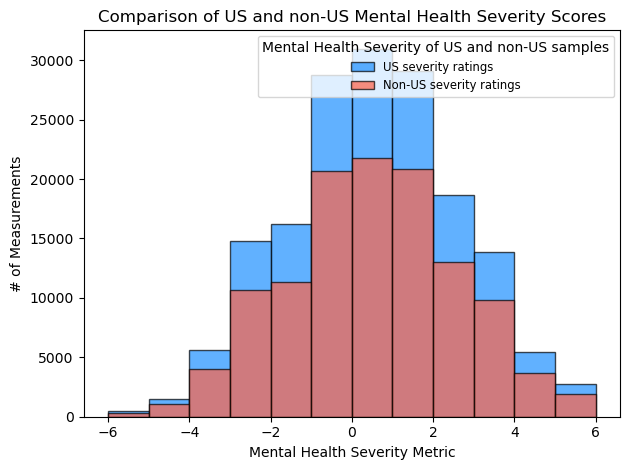

In [61]:
## Create histogram representing distribution of mental health severity scores for US and non-US samples
plt.hist(us_severity_list, bins=12, edgecolor="black", color="dodgerblue", alpha=0.7, label="US severity ratings")
plt.hist(non_us_severity_list, bins=12, edgecolor="black", color="tomato", alpha=0.7, label="Non-US severity ratings")

plt.xlabel("Mental Health Severity Metric")
plt.ylabel("# of Measurements")
plt.title("Comparison of US and non-US Mental Health Severity Scores")

plt.legend(title="Mental Health Severity of US and non-US samples", fontsize="small")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


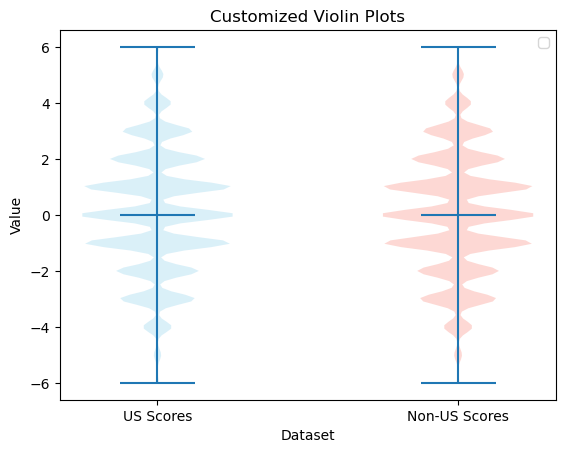

In [63]:
## Create side-by-side violin plots representing distribution of mental health severity scores for US and non-US samples
fig, ax = plt.subplots()

parts = ax.violinplot([us_severity_list, non_us_severity_list], showmeans=False, showmedians=True)

# Customizing colors
colors = ['skyblue', 'salmon', 'lightgreen']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])

# Add labels and title
ax.set_xlabel('Dataset')
ax.set_ylabel('Value')
ax.set_title('Customized Violin Plots')

# Customize x-axis labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['US Scores', 'Non-US Scores'])

plt.show()